In [93]:
#下面这行代码，是为了把自己编写的代码文件当作一共模块导入，这里是把Utilities文件夹中的plotting.py文件当作python的模块导入，对应的是下面的from plotting import newfig, savefig。路径要随着不同设备的系统做相应的修改
import sys #导入sys模块。sys模块提供了一些变量和函数，用于与 Python解释器进行交互和访问。例如，sys.path 是一个 Python 在导入模块时会查找的路径列表，sys.argv 是一个包含命令行参数的列表，sys.exit() 函数可以用于退出 Python 程序。导入 sys 模块后，你就可以在你的程序中使用这些变量和函数了。
# sys.path.insert(0, '../../../Utilities/') #在 Python的sys.path列表中插入一个新的路径。sys.path是一个 Python 在导入模块时会查找的路径列表。新的路径'../../Utilities/'相对于当前脚本的路径。当你尝试导入一个模块时，Python 会在 sys.path 列表中的路径下查找这个模块。通过在列表开始位置插入一个路径，你可以让 Python 优先在这个路径下查找模块。这在你需要导入自定义模块或者不在 Python 标准库中的模块时非常有用。

import torch
#collections是python一个内置模块，提供了一些有用的数据结构
from collections import OrderedDict  #这个类是字典dict的一个子类，用于创建有序的字典。普通字典中元素顺序是无序的，在OrderedDict中元素的顺序是有序的，元素的顺序是按照它们被添加到字典中的顺序决定的。

from pyDOE import lhs #`pyDOE`是一个Python库，用于设计实验。它提供了一些函数来生成各种设计，如因子设计、拉丁超立方设计等。`lhs`是库中的一个函数，全名为"Latin Hypercube Sampling"，拉丁超立方采样。这是一种统计方法，用于生成一个近似均匀分布的多维样本点集。它在参数空间中生成一个非常均匀的样本，这对于高维数值优化问题非常有用，因为它可以更好地覆盖参数空间。
import numpy as np
import matplotlib.pyplot as plt
import scipy.io #导入了scipy库中的io模块。scipy.io模块包含了一些用于文件输入/输出的函数，例如读取和写入.mat文件（MATLAB格式）
from scipy.interpolate import griddata #`scipy.interpolate`是`scipy`库中的一个模块，提供了许多插值工具，用于在给定的离散数据点之间进行插值和拟合。`griddata`是这个模块中的一个函数，用于在无规则的数据点上进行插值。

import random

import skopt #用于优化问题的库，特别是机器学习中的超参数优化
from distutils.version import LooseVersion #distutils是Python的一个标准库，用于构建和安装Python包。LooseVersion是一个类，用于比较版本号


# from plotting_torch import newfig, savefig #从自定义的plotting_torch.py文件中导入了newfig和savefig函数。这两个函数用于创建和保存图形。这两个函数的定义在plotting_torch.py文件中

from mpl_toolkits.axes_grid1 import make_axes_locatable #`mpl_toolkits.axes_grid1`是`matplotlib`库的一个模块，提供了一些高级的工具来控制matplotlib图形中的坐标轴和颜色条。`make_axes_locatable`是模块中的一个函数，用于创建一个可分割的坐标轴。可以在这个坐标轴的四个方向（上、下、左、右）添加新的坐标轴或颜色条。
import matplotlib.gridspec as gridspec #是`matplotlib`库的一个模块，用于创建一个网格布局来放置子图。在`matplotlib`中可以创建一个或多个子图（subplot），每个子图都有自己的坐标轴，并可以在其中绘制图形。`gridspec`模块提供了一个灵活的方式来创建和放置子图。
import time #一个内置模块，用于处理时间相关的操作。


from tqdm import tqdm #一个快速，可扩展的python进度条库，可以在python长循环中添加一个进度提示信息，用户只需要封装任意的迭代器tqdm(iterator)。

import seaborn as sns  # 导入seaborn库用于绘制密度图

from sklearn.cluster import KMeans #sklearn是一个广泛使用的机器学习库，提供了各种算法和工具用于数据挖掘和分析。Kmeans是聚类算法，用于将数据分成预先指定数量的簇
import faiss #一种高效的相似性搜索和密集向量聚类库，适用于在大规模数据中进行高维向量的搜索和聚类操作
#faiss的安装方法：conda install -c conda-forge faiss-gpu
import matplotlib.cm as cm

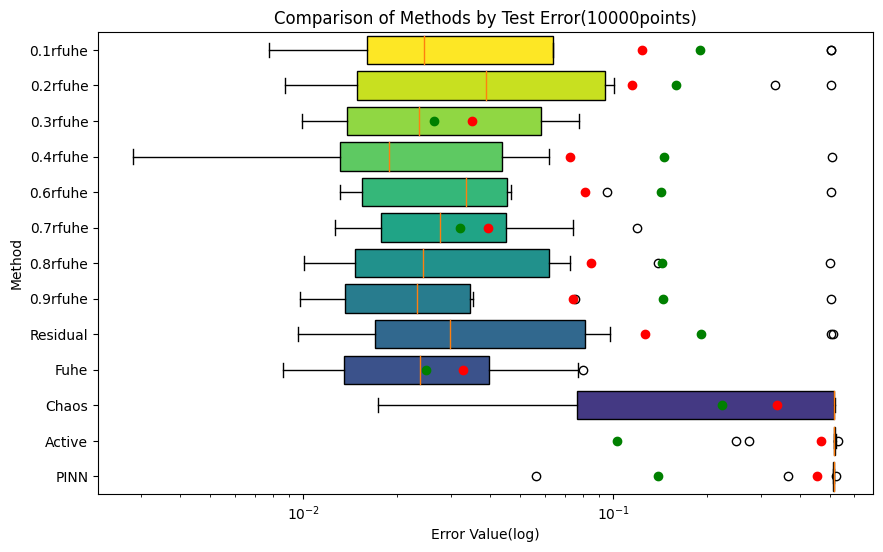

In [94]:
# 示例数据
methods = ['PINN', 'Active', 'Chaos', 'Fuhe', 'Residual', '0.9rfuhe', '0.8rfuhe', '0.7rfuhe', '0.6rfuhe', '0.4rfuhe', '0.3rfuhe', '0.2rfuhe', '0.1rfuhe']
seeds = [1, 2, 3, 4, 5]
loss_values = {
    'PINN': [0.5138634337059544, 0.5139442566099618, 0.5145709489619981, 0.5134050003858026, 0.5137435187227776, 0.5121459269126543, 0.366070082686503, 0.5232695149603436, 0.05641613126684718, 0.5127521897426395],
    'Active': [0.5167405072498248, 0.514044742938601, 0.274928544039304, 0.5210823800309096, 0.5231767548095724, 0.24878267112159277, 0.5159753983106158, 0.514175486787315, 0.513750476840731, 0.5300824335436722],
    'Chaos': [0.0330096268553925, 0.5173334174719045, 0.17947887624621212, 0.041876130790549554, 0.5190852897093937, 0.5177580702630193, 0.0174505154596534, 0.5136712806821667, 0.5153717179844279, 0.5143807788631218],
    'Fuhe': [0.04283010591812487, 0.029496261138505578, 0.07665814806194686, 0.014370877635628289, 0.01308334701381296, 0.013306558421684295, 0.008570474950341155, 0.07989767455306308, 0.018165351442235404, 0.030847031909014402],
    'Residual': [0.503476662745909, 0.030824330860521162, 0.030312355708054576, 0.028961692235123272, 0.009589581930364726, 0.015765321595985357, 0.013170160854030047, 0.09744528812568404, 0.5129691373024808, 0.02094856580434456],
    '0.9rfuhe': [0.5033180882989255, 0.03525443358295534, 0.03228384173738896, 0.022466738769119813, 0.01308334701381296, 0.009790810713268181, 0.015384627254273168, 0.07529103347344838, 0.009845526297655083, 0.024132849005931857],
    '0.8rfuhe': [0.13917189934511934, 0.029496261138505578, 0.5010316497908547, 0.019179419752336734, 0.01308334701381296, 0.0139793765169447, 0.016696317074130378, 0.07271571210373386, 0.010064841977449897, 0.030637030661487496],
    '0.7rfuhe': [0.11902412232055831, 0.029496261138505578, 0.04868614188964607, 0.016913083103594788, 0.01308334701381296, 0.02047093747201132, 0.025770416237012612, 0.07426599025238889, 0.012691806708453884, 0.033725012652491296],
    '0.6rfuhe': [0.5041011011805181, 0.029496261138505578, 0.04665168946207178, 0.04210953275853282, 0.01308334701381296, 0.01638610638141514, 0.013731168195435324, 0.09539365329328972, 0.01515274264201409, 0.037227281228720675],
    '0.4rfuhe': [0.5063337004544747, 0.029496261138505578, 0.04846355467941308, 0.013946037280722953, 0.01308334701381296, 0.013306558421684295, 0.002826847372742289, 0.06212186142812506, 0.010266572808192641, 0.02374327211021999],
    '0.3rfuhe': [0.07642741429691556, 0.029496261138505578, 0.015103036466137622, 0.06800366849369593, 0.01308334701381296, 0.013348632276138105, 0.009886468937593419, 0.07738124354614481, 0.017603298987518157, 0.02973274276969343],
    '0.2rfuhe': [0.5057193782141942, 0.029496261138505578, 0.0483545731754511, 0.3316329484002109, 0.01308334701381296, 0.013348632276138105, 0.01933415053382793, 0.07479779321924701, 0.008744161864825727, 0.10054737476574824],
    '0.1rfuhe': [0.5041216457110013, 0.029496261138505578, 0.06395838606336252, 0.019641882445610066, 0.01308334701381296, 0.01611829138673908, 0.007736643960650769, 0.06336562299227516, 0.016002966587539066, 0.5041165655547843]
}

# 创建图像
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制箱线图
data = [loss_values[method] for method in methods]
box = ax.boxplot(data, vert=False, patch_artist=True, labels=methods, widths=0.8)

# 生成颜色
colors = cm.viridis(np.linspace(0, 1, len(methods)))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# 设置对数刻度
ax.set_xscale('log')

# 计算均值和标准差，并在图中标注
for i, method in enumerate(methods):
    mean = np.mean(loss_values[method])
    std = np.std(loss_values[method])
    ax.scatter(mean, i + 1, color='red', zorder=2)  # 标注均值
    ax.scatter(std, i + 1, color='green', zorder=2)  # 标注均值

# 添加标题和标签
ax.set_title('Comparison of Methods by Test Error(10000points)')
ax.set_xlabel('Error Value(log)')
ax.set_ylabel('Method')

# 显示图像
plt.show()

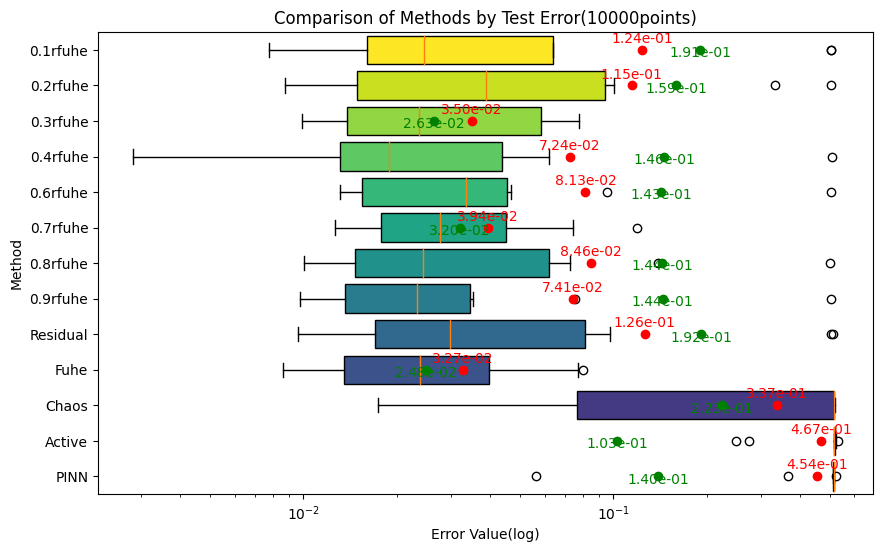

In [95]:
# 示例数据
methods = ['PINN', 'Active', 'Chaos', 'Fuhe', 'Residual', '0.9rfuhe', '0.8rfuhe', '0.7rfuhe', '0.6rfuhe', '0.4rfuhe', '0.3rfuhe', '0.2rfuhe', '0.1rfuhe']
seeds = [1, 2, 3, 4, 5]
loss_values = {
    'PINN': [0.5138634337059544, 0.5139442566099618, 0.5145709489619981, 0.5134050003858026, 0.5137435187227776, 0.5121459269126543, 0.366070082686503, 0.5232695149603436, 0.05641613126684718, 0.5127521897426395],
    'Active': [0.5167405072498248, 0.514044742938601, 0.274928544039304, 0.5210823800309096, 0.5231767548095724, 0.24878267112159277, 0.5159753983106158, 0.514175486787315, 0.513750476840731, 0.5300824335436722],
    'Chaos': [0.0330096268553925, 0.5173334174719045, 0.17947887624621212, 0.041876130790549554, 0.5190852897093937, 0.5177580702630193, 0.0174505154596534, 0.5136712806821667, 0.5153717179844279, 0.5143807788631218],
    'Fuhe': [0.04283010591812487, 0.029496261138505578, 0.07665814806194686, 0.014370877635628289, 0.01308334701381296, 0.013306558421684295, 0.008570474950341155, 0.07989767455306308, 0.018165351442235404, 0.030847031909014402],
    'Residual': [0.503476662745909, 0.030824330860521162, 0.030312355708054576, 0.028961692235123272, 0.009589581930364726, 0.015765321595985357, 0.013170160854030047, 0.09744528812568404, 0.5129691373024808, 0.02094856580434456],
    '0.9rfuhe': [0.5033180882989255, 0.03525443358295534, 0.03228384173738896, 0.022466738769119813, 0.01308334701381296, 0.009790810713268181, 0.015384627254273168, 0.07529103347344838, 0.009845526297655083, 0.024132849005931857],
    '0.8rfuhe': [0.13917189934511934, 0.029496261138505578, 0.5010316497908547, 0.019179419752336734, 0.01308334701381296, 0.0139793765169447, 0.016696317074130378, 0.07271571210373386, 0.010064841977449897, 0.030637030661487496],
    '0.7rfuhe': [0.11902412232055831, 0.029496261138505578, 0.04868614188964607, 0.016913083103594788, 0.01308334701381296, 0.02047093747201132, 0.025770416237012612, 0.07426599025238889, 0.012691806708453884, 0.033725012652491296],
    '0.6rfuhe': [0.5041011011805181, 0.029496261138505578, 0.04665168946207178, 0.04210953275853282, 0.01308334701381296, 0.01638610638141514, 0.013731168195435324, 0.09539365329328972, 0.01515274264201409, 0.037227281228720675],
    '0.4rfuhe': [0.5063337004544747, 0.029496261138505578, 0.04846355467941308, 0.013946037280722953, 0.01308334701381296, 0.013306558421684295, 0.002826847372742289, 0.06212186142812506, 0.010266572808192641, 0.02374327211021999],
    '0.3rfuhe': [0.07642741429691556, 0.029496261138505578, 0.015103036466137622, 0.06800366849369593, 0.01308334701381296, 0.013348632276138105, 0.009886468937593419, 0.07738124354614481, 0.017603298987518157, 0.02973274276969343],
    '0.2rfuhe': [0.5057193782141942, 0.029496261138505578, 0.0483545731754511, 0.3316329484002109, 0.01308334701381296, 0.013348632276138105, 0.01933415053382793, 0.07479779321924701, 0.008744161864825727, 0.10054737476574824],
    '0.1rfuhe': [0.5041216457110013, 0.029496261138505578, 0.06395838606336252, 0.019641882445610066, 0.01308334701381296, 0.01611829138673908, 0.007736643960650769, 0.06336562299227516, 0.016002966587539066, 0.5041165655547843]
}

# 创建图像
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制箱线图
data = [loss_values[method] for method in methods]
box = ax.boxplot(data, vert=False, patch_artist=True, labels=methods, widths=0.8)

# 生成颜色
colors = cm.viridis(np.linspace(0, 1, len(methods)))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# 设置对数刻度
ax.set_xscale('log')

# 计算均值和标准差，并在图中标注
for i, method in enumerate(methods):
    mean = np.mean(loss_values[method])
    std = np.std(loss_values[method])
    ax.scatter(mean, i + 1, color='red', zorder=2)  # 标注均值
    ax.scatter(std, i + 1, color='green', zorder=2)  # 标注标准差
    ax.text(mean, i + 1.2, f'{mean:.2e}', color='red', ha='center')  # 标注均值具体值
    ax.text(std, i + 0.8, f'{std:.2e}', color='green', ha='center')  # 标注标准差具体值

# 添加标题和标签
ax.set_title('Comparison of Methods by Test Error(10000points)')
ax.set_xlabel('Error Value(log)')
ax.set_ylabel('Method')

# 显示图像
plt.show()

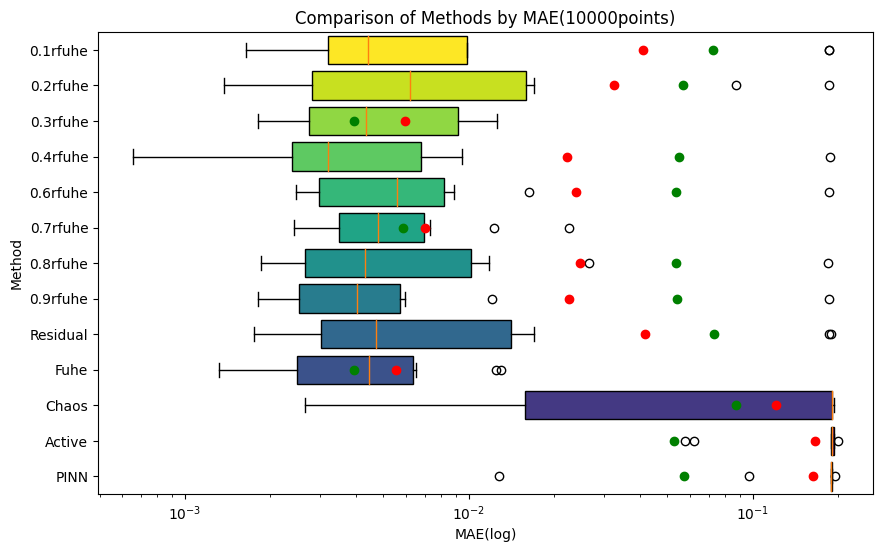

In [96]:
# 示例数据
methods = ['PINN', 'Active', 'Chaos', 'Fuhe', 'Residual', '0.9rfuhe', '0.8rfuhe', '0.7rfuhe', '0.6rfuhe', '0.4rfuhe', '0.3rfuhe', '0.2rfuhe', '0.1rfuhe']
seeds = [1, 2, 3, 4, 5]
loss_values = {
    'PINN': [0.18869883018882527, 0.18893554629533396, 0.18938971024827214, 0.18877030149547394, 0.1895155252253112, 0.1880558421793314, 0.09707242564354608, 0.1948892741460637, 0.012780646979463257, 0.18853987986158116],
    'Active': [0.19018739733024856, 0.1889073011172612, 0.06190013891353853, 0.19360584779302836, 0.19329633295280668, 0.057815091386661174, 0.19111347837820541, 0.19040017268225295, 0.1891832941654387, 0.1990046659834234],
    'Chaos': [0.005828138341393666, 0.19070070464553843, 0.04085396198563568, 0.007410186005626766, 0.19347709663699647, 0.19127349566777357, 0.002639287919593259, 0.1887917021401713, 0.19033683452570715, 0.19009615857542572],
    'Fuhe': [0.0064868983619989174, 0.0051464513176187904, 0.012403229261670435, 0.002282807220359224, 0.0024927479930840035, 0.002483720143804514, 0.0013204837512480804, 0.013002411370956115, 0.0037293857235853084, 0.005951571374139856],
    'Residual': [0.18455240444412485, 0.0055746844853370395, 0.004491458992683739, 0.004952290447341951, 0.0017550903110990703, 0.002882865021814738, 0.0023040280142574807, 0.016948164959985242, 0.18864333709265216, 0.0034424969817988408],
    '0.9rfuhe': [0.1848549703572672, 0.0059722200530020345, 0.004864617736912861, 0.0037481469313050695, 0.0024927479930840035, 0.001800342350606371, 0.0025795700487295983, 0.012051920731922771, 0.0018205854379851432, 0.004334353742433154],
    '0.8rfuhe': [0.0263816173281843, 0.0051464513176187904, 0.18360648960995235, 0.0034499380034879435, 0.0024927479930840035, 0.002671534650536338, 0.002639114241603232, 0.011805309401947343, 0.0018471158888281889, 0.005382613967233597],
    '0.7rfuhe': [0.022415860455158733, 0.0051464513176187904, 0.007277360088839752, 0.0033428006695058903, 0.0024927479930840035, 0.003920156913350217, 0.004456794065700234, 0.012268080037844431, 0.0024153006462443523, 0.006006331283858003],
    '0.6rfuhe': [0.18477406135673094, 0.0051464513176187904, 0.008866620646297563, 0.006092205798505475, 0.0024927479930840035, 0.0031624707406865643, 0.0024536381999015924, 0.0162783402685523, 0.0028831651831143297, 0.005997829561127986],
    '0.4rfuhe': [0.18610197907515957, 0.0051464513176187904, 0.00728937457345088, 0.002334296997623652, 0.0024927479930840035, 0.002483720143804514, 0.0006572679081547424, 0.009423638476586295, 0.0017527701498353326, 0.0038872245732213557],
    '0.3rfuhe': [0.01206422795833085, 0.0051464513176187904, 0.0034031698350557643, 0.010456778325529978, 0.0024927479930840035, 0.002513912748853606, 0.0018013341828916512, 0.012596771575629866, 0.0035619279597407117, 0.005350519369552768],
    '0.2rfuhe': [0.18597453117551452, 0.0051464513176187904, 0.007268208908937879, 0.08725368599561703, 0.0024927479930840035, 0.002513912748853606, 0.003652431517462617, 0.012305438724552663, 0.0013692073470004727, 0.01698515535396283],
    '0.1rfuhe': [0.1853161592205728, 0.0051464513176187904, 0.00979421419302598, 0.003642963941263623, 0.0024927479930840035, 0.0031451052559725735, 0.0016458515290573897, 0.009848993778424565, 0.0032669276139928485, 0.1851002895412259]
}

# 创建图像
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制箱线图
data = [loss_values[method] for method in methods]
box = ax.boxplot(data, vert=False, patch_artist=True, labels=methods, widths=0.8)

# 生成颜色
colors = cm.viridis(np.linspace(0, 1, len(methods)))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)


# 设置对数刻度
ax.set_xscale('log')

# 计算均值和标准差，并在图中标注
for i, method in enumerate(methods):
    mean = np.mean(loss_values[method])
    std = np.std(loss_values[method])
    ax.scatter(mean, i + 1, color='red', zorder=2)  # 标注均值
    ax.scatter(std, i + 1, color='green', zorder=2)  # 标注均值

# 添加标题和标签
ax.set_title('Comparison of Methods by MAE(10000points)')
ax.set_xlabel('MAE(log)')
ax.set_ylabel('Method')

# 显示图像
plt.show()

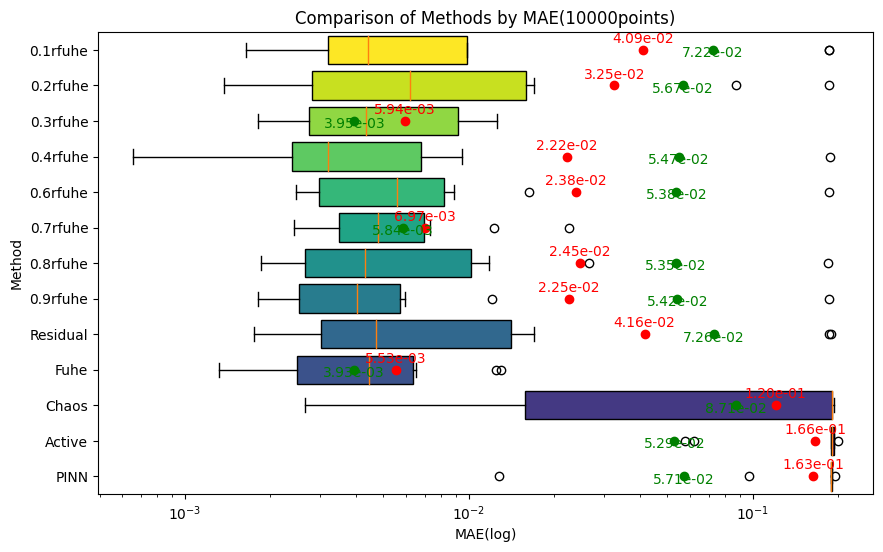

In [97]:
# 示例数据
methods = ['PINN', 'Active', 'Chaos', 'Fuhe', 'Residual', '0.9rfuhe', '0.8rfuhe', '0.7rfuhe', '0.6rfuhe', '0.4rfuhe', '0.3rfuhe', '0.2rfuhe', '0.1rfuhe']
seeds = [1, 2, 3, 4, 5]
loss_values = {
    'PINN': [0.18869883018882527, 0.18893554629533396, 0.18938971024827214, 0.18877030149547394, 0.1895155252253112, 0.1880558421793314, 0.09707242564354608, 0.1948892741460637, 0.012780646979463257, 0.18853987986158116],
    'Active': [0.19018739733024856, 0.1889073011172612, 0.06190013891353853, 0.19360584779302836, 0.19329633295280668, 0.057815091386661174, 0.19111347837820541, 0.19040017268225295, 0.1891832941654387, 0.1990046659834234],
    'Chaos': [0.005828138341393666, 0.19070070464553843, 0.04085396198563568, 0.007410186005626766, 0.19347709663699647, 0.19127349566777357, 0.002639287919593259, 0.1887917021401713, 0.19033683452570715, 0.19009615857542572],
    'Fuhe': [0.0064868983619989174, 0.0051464513176187904, 0.012403229261670435, 0.002282807220359224, 0.0024927479930840035, 0.002483720143804514, 0.0013204837512480804, 0.013002411370956115, 0.0037293857235853084, 0.005951571374139856],
    'Residual': [0.18455240444412485, 0.0055746844853370395, 0.004491458992683739, 0.004952290447341951, 0.0017550903110990703, 0.002882865021814738, 0.0023040280142574807, 0.016948164959985242, 0.18864333709265216, 0.0034424969817988408],
    '0.9rfuhe': [0.1848549703572672, 0.0059722200530020345, 0.004864617736912861, 0.0037481469313050695, 0.0024927479930840035, 0.001800342350606371, 0.0025795700487295983, 0.012051920731922771, 0.0018205854379851432, 0.004334353742433154],
    '0.8rfuhe': [0.0263816173281843, 0.0051464513176187904, 0.18360648960995235, 0.0034499380034879435, 0.0024927479930840035, 0.002671534650536338, 0.002639114241603232, 0.011805309401947343, 0.0018471158888281889, 0.005382613967233597],
    '0.7rfuhe': [0.022415860455158733, 0.0051464513176187904, 0.007277360088839752, 0.0033428006695058903, 0.0024927479930840035, 0.003920156913350217, 0.004456794065700234, 0.012268080037844431, 0.0024153006462443523, 0.006006331283858003],
    '0.6rfuhe': [0.18477406135673094, 0.0051464513176187904, 0.008866620646297563, 0.006092205798505475, 0.0024927479930840035, 0.0031624707406865643, 0.0024536381999015924, 0.0162783402685523, 0.0028831651831143297, 0.005997829561127986],
    '0.4rfuhe': [0.18610197907515957, 0.0051464513176187904, 0.00728937457345088, 0.002334296997623652, 0.0024927479930840035, 0.002483720143804514, 0.0006572679081547424, 0.009423638476586295, 0.0017527701498353326, 0.0038872245732213557],
    '0.3rfuhe': [0.01206422795833085, 0.0051464513176187904, 0.0034031698350557643, 0.010456778325529978, 0.0024927479930840035, 0.002513912748853606, 0.0018013341828916512, 0.012596771575629866, 0.0035619279597407117, 0.005350519369552768],
    '0.2rfuhe': [0.18597453117551452, 0.0051464513176187904, 0.007268208908937879, 0.08725368599561703, 0.0024927479930840035, 0.002513912748853606, 0.003652431517462617, 0.012305438724552663, 0.0013692073470004727, 0.01698515535396283],
    '0.1rfuhe': [0.1853161592205728, 0.0051464513176187904, 0.00979421419302598, 0.003642963941263623, 0.0024927479930840035, 0.0031451052559725735, 0.0016458515290573897, 0.009848993778424565, 0.0032669276139928485, 0.1851002895412259]
}

# 创建图像
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制箱线图
data = [loss_values[method] for method in methods]
box = ax.boxplot(data, vert=False, patch_artist=True, labels=methods, widths=0.8)

# 生成颜色
colors = cm.viridis(np.linspace(0, 1, len(methods)))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)


# 设置对数刻度
ax.set_xscale('log')

# 计算均值和标准差，并在图中标注
for i, method in enumerate(methods):
    mean = np.mean(loss_values[method])
    std = np.std(loss_values[method])
    ax.scatter(mean, i + 1, color='red', zorder=2)  # 标注均值
    ax.scatter(std, i + 1, color='green', zorder=2)  # 标注标准差
    ax.text(mean, i + 1.2, f'{mean:.2e}', color='red', ha='center')  # 标注均值具体值
    ax.text(std, i + 0.8, f'{std:.2e}', color='green', ha='center')  # 标注标准差具体值


# 添加标题和标签
ax.set_title('Comparison of Methods by MAE(10000points)')
ax.set_xlabel('MAE(log)')
ax.set_ylabel('Method')

# 显示图像
plt.show()

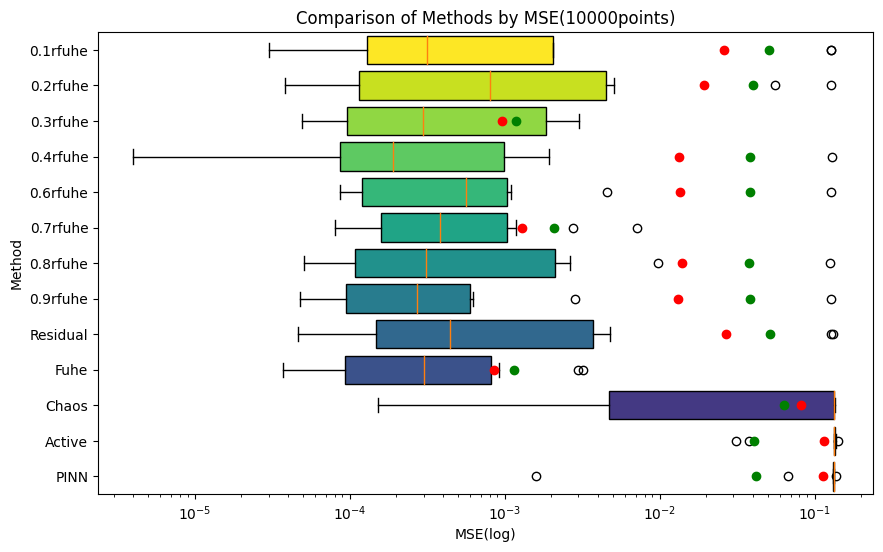

In [98]:
# 示例数据
methods = ['PINN', 'Active', 'Chaos', 'Fuhe', 'Residual', '0.9rfuhe', '0.8rfuhe', '0.7rfuhe', '0.6rfuhe', '0.4rfuhe', '0.3rfuhe', '0.2rfuhe', '0.1rfuhe']
# seeds = [1, 2, 3, 4, 5]
loss_values = {
    'PINN': [0.13282715071156512, 0.13286893737942615, 0.13319316987492028, 0.13259025808317368, 0.13276516495415855, 0.13194072730775663, 0.06740931317005687, 0.1377343600504473, 0.001601024691247273, 0.13225328706793518],
    'Active': [0.13431868825625753, 0.13292089950091632, 0.03802166156195129, 0.1365853763624559, 0.1376855319524459, 0.031133767676702475, 0.13392122629654157, 0.13298852318651255, 0.13276876130876009, 0.14134428463796178],
    'Chaos': [0.0005481162244861871, 0.13462710074253473, 0.01620384614108033, 0.0008821136095968649, 0.1355404336405046, 0.13484820858534535, 0.0001531820746416042, 0.1327278310676994, 0.13360803959806616, 0.13309473960851062],
    'Fuhe': [0.000922762048081095, 0.0004376484216721627, 0.002956024803706549, 0.00010388623582106489, 8.610515412433548e-05, 8.906824961932026e-05, 3.694887393944454e-05, 0.0032111434417318933, 0.00016598889602781696, 0.00047865014290299283],
    'Residual': [0.12751172388130616, 0.0004779459025781704, 0.0004622009191084509, 0.00042192892175832393, 4.625841792279154e-05, 0.00012502506705251492, 8.725163742986205e-05, 0.00477653666334025, 0.13236522456266253, 0.00022074964720265059],
    '0.9rfuhe': [0.12743141463027596, 0.000625199915139944, 0.000524278256803344, 0.00025390514348355676, 8.610515412433548e-05, 4.822016990216619e-05, 0.00011905986460658367, 0.0028515299961958426, 4.8760629142741614e-05, 0.00029296019681014076],
    '0.8rfuhe': [0.00974304113392368, 0.0004376484216721627, 0.12627627116928256, 0.0001850386092244039, 8.610515412433548e-05, 9.83030588829028e-05, 0.00014022737194728334, 0.002659793684717954, 5.095717564962175e-05, 0.0004721551922158129],
    '0.7rfuhe': [0.0071262557241949945, 0.0004376484216721627, 0.0011923455862084226, 0.0001438921140013878, 8.610515412433548e-05, 0.00021079819653301997, 0.0003340675514495096, 0.0027744147198589452, 8.102859829419839e-05, 0.0005721312504179578],
    '0.6rfuhe': [0.12782821361606064, 0.0004376484216721627, 0.0010947782977807825, 0.0008919741586719498, 8.610515412433548e-05, 0.00013506504498881234, 9.484324427444486e-05, 0.0045775214712534176, 0.0001154978558135362, 0.0006971304740716298],
    '0.4rfuhe': [0.12896299055788474, 0.0004376484216721627, 0.0011814679862641364, 9.783473458478906e-05, 8.610515412433548e-05, 8.906824961932026e-05, 4.01972320413392e-06, 0.0019412449927176682, 5.302032802887883e-05, 0.000283578020777396],
    '0.3rfuhe': [0.0029382568745397065, 0.0004376484216721627, 0.00011474135374397623, 0.002326248524388176, 8.610515412433548e-05, 8.96323878364307e-05, 4.916701470612722e-05, 0.0030120545778064512, 0.00015587610971131045, 0.000444694107418576],
    '0.2rfuhe': [0.12865024513947892, 0.0004376484216721627, 0.0011761603530276628, 0.0553231336318729, 8.610515412433548e-05, 8.96323878364307e-05, 0.00018803626614682204, 0.002814290971086383, 3.8461640493100434e-05, 0.005085491108068985],
    '0.1rfuhe': [0.12783863305033516, 0.0004376484216721627, 0.002057720668403529, 0.0001940696588883187, 8.610515412433548e-05, 0.0001306861105752672, 3.010902205298875e-05, 0.002019755714951886, 0.0001288227080490357, 0.12783605654143224]
}

# 创建图像
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制箱线图
data = [loss_values[method] for method in methods]
box = ax.boxplot(data, vert=False, patch_artist=True, labels=methods, widths=0.8)

# 生成颜色
colors = cm.viridis(np.linspace(0, 1, len(methods)))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# 设置对数刻度
ax.set_xscale('log')

# 计算均值和标准差，并在图中标注
for i, method in enumerate(methods):
    mean = np.mean(loss_values[method])
    std = np.std(loss_values[method])
    ax.scatter(mean, i + 1, color='red', zorder=2)  # 标注均值
    ax.scatter(std, i + 1, color='green', zorder=2)  # 标注均值

# 添加标题和标签
ax.set_title('Comparison of Methods by MSE(10000points)')
ax.set_xlabel('MSE(log)')
ax.set_ylabel('Method')

# 显示图像
plt.show()

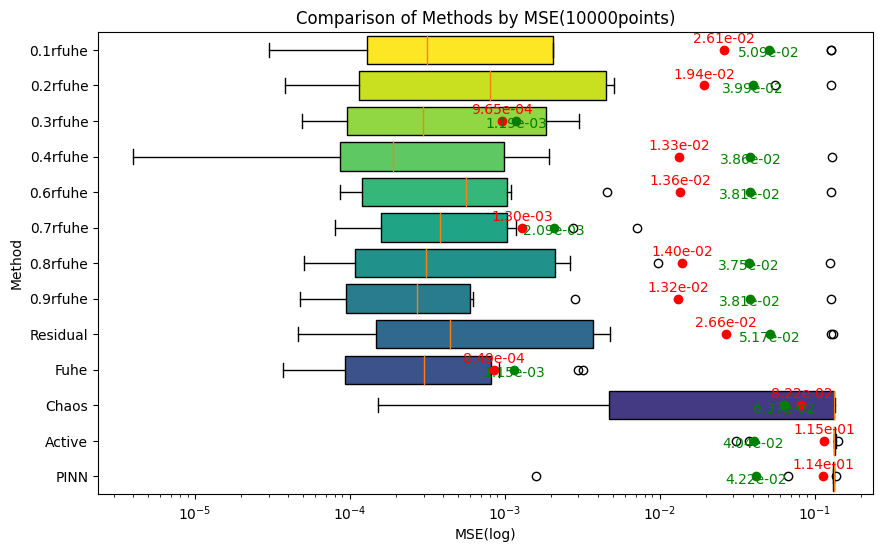

In [99]:
# 示例数据
methods = ['PINN', 'Active', 'Chaos', 'Fuhe', 'Residual', '0.9rfuhe', '0.8rfuhe', '0.7rfuhe', '0.6rfuhe', '0.4rfuhe', '0.3rfuhe', '0.2rfuhe', '0.1rfuhe']
# seeds = [1, 2, 3, 4, 5]
loss_values = {
    'PINN': [0.13282715071156512, 0.13286893737942615, 0.13319316987492028, 0.13259025808317368, 0.13276516495415855, 0.13194072730775663, 0.06740931317005687, 0.1377343600504473, 0.001601024691247273, 0.13225328706793518],
    'Active': [0.13431868825625753, 0.13292089950091632, 0.03802166156195129, 0.1365853763624559, 0.1376855319524459, 0.031133767676702475, 0.13392122629654157, 0.13298852318651255, 0.13276876130876009, 0.14134428463796178],
    'Chaos': [0.0005481162244861871, 0.13462710074253473, 0.01620384614108033, 0.0008821136095968649, 0.1355404336405046, 0.13484820858534535, 0.0001531820746416042, 0.1327278310676994, 0.13360803959806616, 0.13309473960851062],
    'Fuhe': [0.000922762048081095, 0.0004376484216721627, 0.002956024803706549, 0.00010388623582106489, 8.610515412433548e-05, 8.906824961932026e-05, 3.694887393944454e-05, 0.0032111434417318933, 0.00016598889602781696, 0.00047865014290299283],
    'Residual': [0.12751172388130616, 0.0004779459025781704, 0.0004622009191084509, 0.00042192892175832393, 4.625841792279154e-05, 0.00012502506705251492, 8.725163742986205e-05, 0.00477653666334025, 0.13236522456266253, 0.00022074964720265059],
    '0.9rfuhe': [0.12743141463027596, 0.000625199915139944, 0.000524278256803344, 0.00025390514348355676, 8.610515412433548e-05, 4.822016990216619e-05, 0.00011905986460658367, 0.0028515299961958426, 4.8760629142741614e-05, 0.00029296019681014076],
    '0.8rfuhe': [0.00974304113392368, 0.0004376484216721627, 0.12627627116928256, 0.0001850386092244039, 8.610515412433548e-05, 9.83030588829028e-05, 0.00014022737194728334, 0.002659793684717954, 5.095717564962175e-05, 0.0004721551922158129],
    '0.7rfuhe': [0.0071262557241949945, 0.0004376484216721627, 0.0011923455862084226, 0.0001438921140013878, 8.610515412433548e-05, 0.00021079819653301997, 0.0003340675514495096, 0.0027744147198589452, 8.102859829419839e-05, 0.0005721312504179578],
    '0.6rfuhe': [0.12782821361606064, 0.0004376484216721627, 0.0010947782977807825, 0.0008919741586719498, 8.610515412433548e-05, 0.00013506504498881234, 9.484324427444486e-05, 0.0045775214712534176, 0.0001154978558135362, 0.0006971304740716298],
    '0.4rfuhe': [0.12896299055788474, 0.0004376484216721627, 0.0011814679862641364, 9.783473458478906e-05, 8.610515412433548e-05, 8.906824961932026e-05, 4.01972320413392e-06, 0.0019412449927176682, 5.302032802887883e-05, 0.000283578020777396],
    '0.3rfuhe': [0.0029382568745397065, 0.0004376484216721627, 0.00011474135374397623, 0.002326248524388176, 8.610515412433548e-05, 8.96323878364307e-05, 4.916701470612722e-05, 0.0030120545778064512, 0.00015587610971131045, 0.000444694107418576],
    '0.2rfuhe': [0.12865024513947892, 0.0004376484216721627, 0.0011761603530276628, 0.0553231336318729, 8.610515412433548e-05, 8.96323878364307e-05, 0.00018803626614682204, 0.002814290971086383, 3.8461640493100434e-05, 0.005085491108068985],
    '0.1rfuhe': [0.12783863305033516, 0.0004376484216721627, 0.002057720668403529, 0.0001940696588883187, 8.610515412433548e-05, 0.0001306861105752672, 3.010902205298875e-05, 0.002019755714951886, 0.0001288227080490357, 0.12783605654143224]
}

# 创建图像
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制箱线图
data = [loss_values[method] for method in methods]
box = ax.boxplot(data, vert=False, patch_artist=True, labels=methods, widths=0.8)

# 生成颜色
colors = cm.viridis(np.linspace(0, 1, len(methods)))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# 设置对数刻度
ax.set_xscale('log')

# 计算均值和标准差，并在图中标注
for i, method in enumerate(methods):
    mean = np.mean(loss_values[method])
    std = np.std(loss_values[method])
    ax.scatter(mean, i + 1, color='red', zorder=2)  # 标注均值
    ax.scatter(std, i + 1, color='green', zorder=2)  # 标注标准差
    ax.text(mean, i + 1.2, f'{mean:.2e}', color='red', ha='center')  # 标注均值具体值
    ax.text(std, i + 0.8, f'{std:.2e}', color='green', ha='center')  # 标注标准差具体值


# 添加标题和标签
ax.set_title('Comparison of Methods by MSE(10000points)')
ax.set_xlabel('MSE(log)')
ax.set_ylabel('Method')

# 显示图像
plt.show()